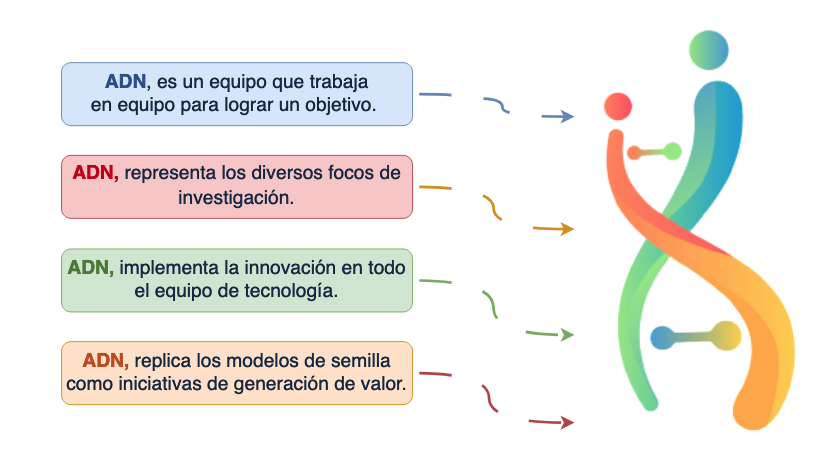




# Clasificando digitos con Redes Neuronales usando Keras

Uno de los conjuntos de datos ampliamente utilizados para la clasificación de imágenes es el conjunto de datos MNIST (LeCun et al., 1998) de dígitos escritos a mano. En el momento de su lanzamiento en la década de 1990, planteó un desafío formidable para la mayoría de los algoritmos de aprendizaje automático, que constaba de 60.000 imágenes de resolución28x28 de píxeles (más un conjunto de datos de prueba de 10,000 imágenes).

Lograr una alta precisión en el reconocimiento de dígitos fue un componente clave en la automatización de la clasificación de cartas para el servicio postal de EEUU.

Durante más de una década, MNIST sirvió como punto de referencia para comparar algoritmos de aprendizaje automático.
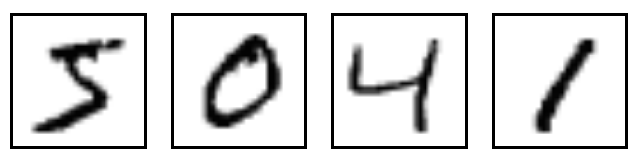


## Pasos:


1.   Instalar librerias requeridas
2.   Preparar la data
3.   Crear la primera red neuronal
4.   Entrenar la red neuronal



---





### ***1. Instalar librerias requeridas***

In [ ]:
install.packages("pacman")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#    tidyverse: El paquete tidyverse es una colección de paquetes de R diseñados para trabajar en análisis de datos. Incluye paquetes como ggplot2 para visualización, dplyr para manipulación de datos
#    keras:     keras es una interfaz de alto nivel para construir y entrenar modelos de redes neuronales en R.
#               Proporciona funciones simplificadas para tareas comunes en el aprendizaje profundo, como la construcción de capas, la compilación de modelos y el entrenamiento.
#    caret:     El paquete caret (Classification And REgression Training) proporciona herramientas para el entrenamiento y la evaluación de modelos de clasificación y regresión.
#               Facilita la creación de modelos, la selección de características, la evaluación del rendimiento y otras tareas relacionadas con el aprendizaje supervisado.

require('pacman')
p_load("tidyverse","keras",'caret')

Loading required package: pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’



keras installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’



caret installed



# ¿Qué es Keras?

Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. Keras proporciona una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo en una variedad de plataformas.La biblioteca Keras es conocida por ser fácil de usar, modular y extensible. Permite a los usuarios crear modelos de aprendizaje profundo con pocas líneas de código y está diseñada para ser utilizada en combinación con otras bibliotecas populares de Python, como TensorFlow.

Keras ofrece una amplia gama de bloques constructivos para construir modelos de Redes Neuronales. También incluye una amplia gama de funciones de pérdida, optimizadores y métricas de evaluación que se pueden utilizar para entrenar y evaluar modelos.

En el caso específico de R, la instalación de Keras puede ser complicada si no se tienen todas las dependencias y configuraciones necesarias en su lugar. Por ejemplo, es necesario tener TensorFlow instalado correctamente antes de poder instalar y utilizar Keras en R. También puede ser necesario instalar otras dependencias adicionales, como el paquete reticulate, que se utiliza para conectar R con Python. Para saber más de cómo instalar keras localmente pueden ir acá. Colaboratory, o "Colab" es un producto de Google Research. Permite a cualquier usuario escribir y ejecutar código arbitrario de Python y ahora también en R en el navegador. Es especialmente adecuado para tareas de aprendizaje automático, análisis de datos y educación, por esto mismo, provee una manera fácil de ejecutar las funcionalidades de TensorFlow directamente en el navegador por lo que lo vamos a usar en este tutorial.


### ***2. Preparar la data***

In [ ]:
set.seed(10101)

mnist <- dataset_mnist()
mnist

$train
$train$x
, , 1

         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
    [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [13,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [29,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [44,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [50,]    0    0    0    0    0    0    0    0    0     0     0     0     0

In [ ]:
# DATA de entrenamiento
x_train <- mnist$train$x
head(x_train)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 2

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 3

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 4

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0    46   120   159  

In [ ]:
# DATA de test
x_test <- mnist$test$x
head(x_test)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 2

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 3

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 4

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0  

In [ ]:
y_test <- mnist$test$y
y_test

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2
   [37] 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0
   [73] 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1
  [109] 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1
  [145] 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8
  [181] 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0
  [217] 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1
  [253] 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4
  [289] 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3
  [325] 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9
  [361] 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5
  [397] 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8
  [433] 4 5 9 8 8 3 7 6 0 0 3 0 2 6 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2
  [469] 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 8 9 4 0 6 3 9 5 2
  [505] 1 3 1 3 6 5 7 4 2 2 6 3 2 6 5 4 8 9 7 1 3 0 3 8 3 1 9 3 4 4 6 4 2 1 8 2
  [541] 5 4 8 8 4 0 0 2 3 2 7 7 0 8 7 4 4 7 9 6 9 0 9 8 0 4 6 0 6 3 5 4 8 3 3 9
  [577] 3 3 3 7 8 0 8 2 1 7 0 6 5 4 3 8 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 4 0
  [613] 2 2 3 1 9 7 5 1 0 8 4 6 2 6 7 9 3 2 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 2 1
  [649] 3 7 6 7 1 2 5 8 0 3 7 2 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3
  [685] 7 8 3 3 6 7 2 8 5 8 5 1 1 4 4 3 1 0 7 7 0 7 9 4 4 8 5 5 4 0 8 2 1 0 8 4
  [721] 5 0 4 0 6 1 7 3 2 6 7 2 6 9 3 1 4 6 2 5 4 2 0 6 2 1 7 3 4 1 0 5 4 3 1 1
  [757] 7 4 9 9 4 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 8 9 4 1 5
  [793] 3 8 0 3 2 5 1 2 8 3 4 4 0 8 8 3 3 1 7 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 4
  [829] 2 4 2 1 7 9 6 1 1 2 4 8 1 7 7 4 8 0 7 3 1 3 1 0 7 7 0 3 5 5 2 7 6 6 9 2
  [865] 8 3 5 2 2 5 6 0 8 2 9 2 8 8 8 8 7 4 9 3 0 6 6 3 2 1 3 2 2 9 3 0 0 5 7 8
  [901] 1 4 4 6 0 2 9 1 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 2 3 2 3 9 1 7 4 0 3 5 5
  [937] 8 6 3 2 6 7 6 6 3 2 7 8 1 1 7 5 6 4 9 5 1 3 3 4 7 8 9 1 1 6 9 1 4 4 5 4
  [973] 0 6 2 2 3 1 5 1 2 0 3 8 1 2 6 7 1 6 2 3 9 0 1 2 2 0 8 9 9 0 2 5 1 9 7 8
 [1009] 1 0 4 1 7 9 6 4 2 6 8 1 3 7 5 4 4 1 8 1 3 8 1 2 5 8 0 6 2 1 1 7 1 5 3 4
 [1045] 6 9 5 0 9 2 2 4 8 2 1 7 2 4 9 4 4 0 3 9 2 2 3 3 8 3 5 7 3 5 8 1 2 4 4 6
 [1081] 4 9 5 1 0 6 9 5 9 5 9 7 3 8 0 3 7 1 3 6 7 8 5 9 7 9 6 9 6 3 7 4 4 5 3 5
 [1117] 4 7 8 7 8 0 7 6 8 8 7 3 3 1 9 5 2 7 3 5 1 1 2 1 4 7 4 7 5 4 5 4 0 8 3 6
 [1153] 9 6 0 2 7 4 4 4 4 6 6 4 7 9 3 4 5 5 8 7 3 7 2 7 0 2 4 1 1 6 6 9 2 8 7 2
 [1189] 0 1 5 0 9 1 7 0 6 0 8 6 8 1 8 0 3 3 7 2 3 6 2 1 6 1 1 3 7 9 0 8 0 5 4 0
 [1225] 2 8 7 2 9 8 4 0 9 5 8 5 1 2 1 3 1 7 4 5 7 2 0 9 8 8 6 2 5 4 1 9 2 1 5 8
 [1261] 7 0 2 4 4 3 6 8 8 2 4 0 5 0 4 4 7 9 3 4 1 5 9 7 3 5 8 8 0 5 3 3 6 6 0 1
 [1297] 6 0 3 5 4 4 1 2 9 1 4 6 9 9 3 9 8 4 4 3 1 3 1 8 8 7 9 4 8 8 7 9 7 1 4 5
 [1333] 6 0 5 2 2 2 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 7 2 4 1 7 1 7 6 7 8 2 7 3
 [1369] 1 7 5 8 2 6 2 2 5 6 5 0 9 2 4 3 3 9 7 6 6 8 0 4 1 5 8 2 9 1 8 0 6 7 2 1
 [1405] 0 5 5 2 0 2 2 0 2 4 9 8 0 9 9 4 6 5 4 9 1 8 3 4 9 9 1 2 2 8 1 9 6 4 0 9
 [1441] 4 8 3 8 6 0 2 5 1 9 6 2 9 4 0 9 6 0 6 2 5 4 2 3 8 4 5 5 0 3 8 5 3 5 8 6
 [1477] 5 7 6 3 3 9 6 1 1 2 9 0 4 3 3 6 9 5 7 3 7 7 7 8 7 9 8 3 0 7 2 7 9 4 5 4
 [1513] 9 3 2 1 4 0 2 3 7 5 7 8 8 5 0 1 1 4 8 3 9 0 0 0 6 6 2 3 7 8 4 7 7 9 2 4
 [1549] 1 4 5 2 4 9 9 1 8 4 0 9 8 4 8 7 7 0 7 8 8 6 0 4 8 8 2 4 7 6 6 6 4 7 1 8
 [1585] 8 2 3 6 3 0 0 3 7 6 9 7 9 9 5 4 3 3 6 1 2 3 7 3 3 2 0 3 3 8 4 3 6 3 5 0
 [1621] 2 0 9 0 7 4 6 9 3 5 1 9 6 1 4 5 4 5 0 5 9 5 2 1 2 9 1 9 9 4 0 8 4 5 2 9
 [1657] 2 1 2 1 7 3 6 8 8 4 9 1 9 8 5 7 5 1 1 8 6 5 2 4 4 3 2 3 5 6 8 8 6 2 3 1
 [1693] 0 5 8 9 2 9 6 7 0 4 8 7 1 7 4 1 0 9 7 2 0 0 9 1 7 8 7 8 4 7 2 0 4 6 0 3
 [1729] 1 1 3 3 9 6 7 4 1 5 3 0 8 7 3 9 6 9 3 5 0 2 7 4 5 1 7 5 8 0 8 8 1 5 0 3
 [1765] 0 3 1 4 0 3 7 2 7 1 8 0 7 0 4 3 1 9 8 7 7 1 4 9 9 3 2 1 7 9 0 2 0 3 3 7
 [18

In [ ]:
dim(x_train)

[1] 60000    28    28

# Que quiere decir esta respuesta?


1.   **60000:** Cantidad de registros en la data de entrenamiento
2.   **28:** Indica la altura (número de filas) de cada imagen.
3.   **28:** Indica la anchura (número de columnas) de cada imagen.

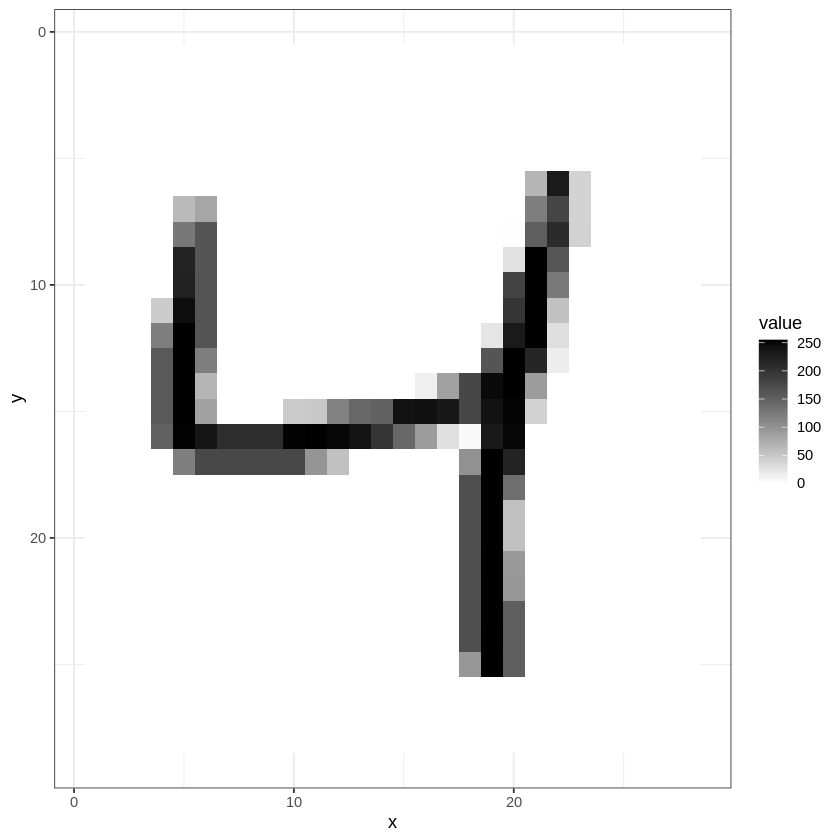

In [ ]:
# Visualizar una imagen utilizando el paquete ggplot2

# Paso 1: Extracción de una fila de datos y conversión a data frame
image_1 <- as.data.frame(x_train[3, , ])

# Paso 2: Asignación de nombres de columnas utilizando secuencias numéricas
colnames(image_1) <- seq_len(ncol(image_1))

# Paso 3: Añadir una columna 'y' representando las filas de la imagen
image_1$y <- seq_len(nrow(image_1))

# Paso 4: Reorganización de datos utilizando la función gather
image_1 <- gather(image_1, "x", "value", -y)
# La columna 'x' contendrá los nombres de las columnas originales,
# la columna 'value' contendrá los valores correspondientes,
# y la columna 'y' se mantendrá como está.

# Paso 5: Conversión de la columna 'x' a tipo entero
image_1$x <- as.integer(image_1$x)

# Paso 6: Creación de un gráfico de teselas con ggplot2
ggplot(image_1, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black", na.value = NA) +
  scale_y_reverse() +
  theme_bw()


# Que quiere decir esta respuesta?

Cada espacio (i,j) puede tomar un valor entre **0** (Blanco) y **250** (Negro) para dar color a cada px y dar forma al numero


In [ ]:
# Variable dependiente -> target
# En el contexto del conjunto de datos MNIST, 'y_train' generalmente almacena las etiquetas (números reales) correspondientes a las imágenes en el conjunto de entrenamiento.

# Extracción de las etiquetas (números reales) del conjunto de entrenamiento de MNIST
y_train <- mnist$train$y

# Muestra las primeras filas de 'y_train'
head(y_train)


[1] 5 0 4 1 9 2

# Limpieza de los datos

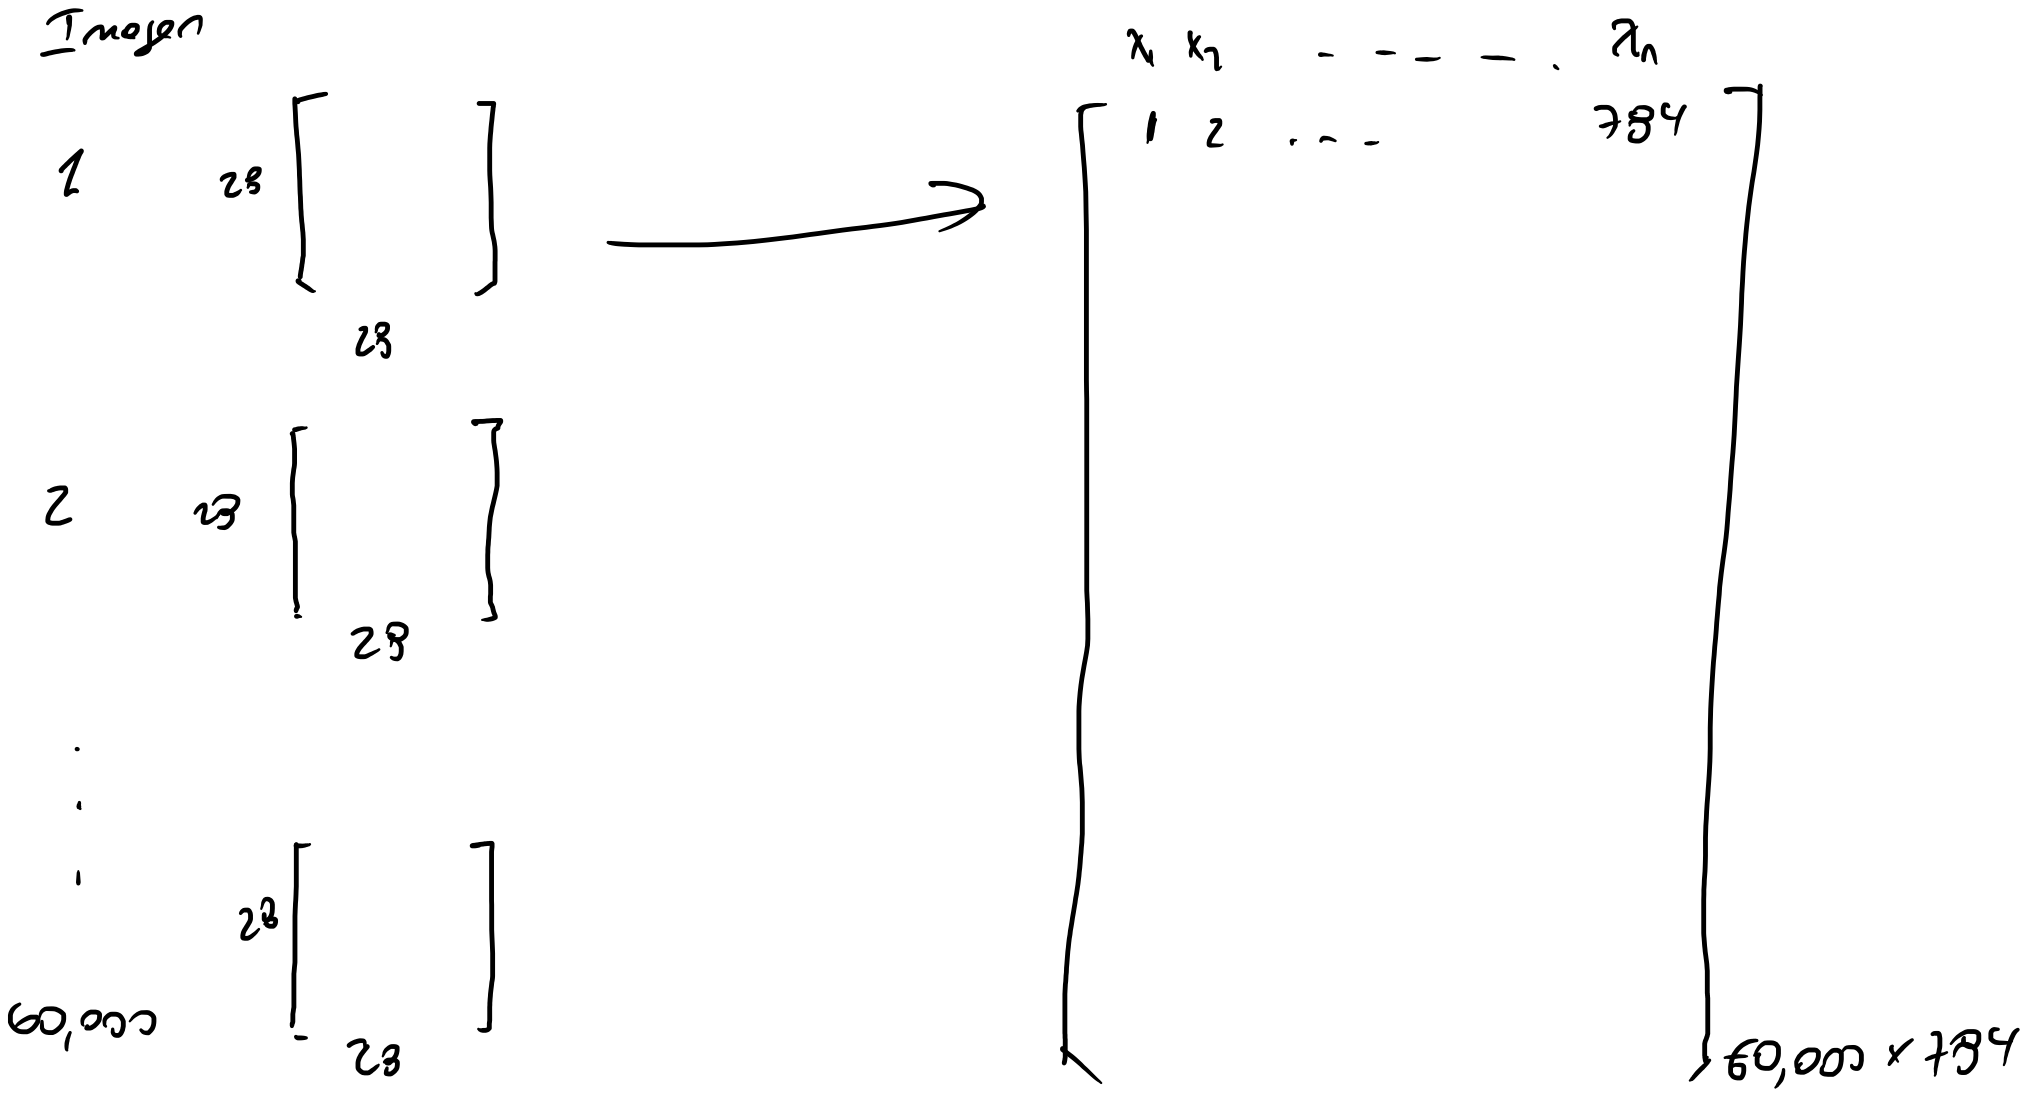

In [ ]:
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
dim(x_train)

[1] 60000   784

In [ ]:
# Ver el primer registro de la nueva matriz
x_train[1,]

[1]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
[163] 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
[181] 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
[199]   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
[217]  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
[235] 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0   0   0
[253]   0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
[271]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[289]   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0   0   0
[307]   0   0   0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0
[325]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[343]   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0
[361]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  35 241
[379] 225 160 108   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[397]   0   0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0
[415]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[433]   0   0  45 186 253 253 150  27   0   0   0   0   0   0   0   0   0   0
[451]   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252 253 187
[469]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[487]   0   0   0   0   0   0   0 249 253 249  64   0   0   0   0   0   0   0
[505]   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253
[523] 253 207   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[541]   0   0   0   0  39 148 229 253 253 253 250 182   0   0   0   0   0   0
[559]   0   0   0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253
[577] 253 201  78   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[595]   0   0  23  66 213 253 253 253 253 198  81   2   0   0   0   0   0   0
[613]   0   0   0   0   0   0   0   0   0   0  18 171 219 253 253 253 253 195
[631]  80   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[649]  55 172 226 253 253 253 253 244 133  11   0   0   0   0   0   0   0   0
[667]   0   0   0   0   0   0   0   0   0   0 136 253 253 253 212 135 132  16
[685]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[703]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[721]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[739]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[757]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[775]   0   0   0   0   0   0   0   0   0   0

In [ ]:
# reshape
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
dim(x_test)

[1] 10000   784

In [ ]:
# rescale pixeles entre 0 y 1
x_train <- x_train / 255
x_test <- x_test / 255
x_train[1,]

[1] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [7] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [13] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [19] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [25] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [31] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [37] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [43] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [49] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [55] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [61] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [67] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [73] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [79] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [85] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [91] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [97] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[103] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[109] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[115] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[121] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[127] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[133] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[139] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[145] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[151] 0.000000000 0.000000000 0.011764706 0.070588235 0.070588235 0.070588235
[157] 0.494117647 0.533333333 0.686274510 0.101960784 0.650980392 1.000000000
[163] 0.968627451 0.498039216 0.000000000 0.000000000 0.000000000 0.000000000
[169] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[175] 0.000000000 0.000000000 0.117647059 0.141176471 0.368627451 0.603921569
[181] 0.666666667 0.992156863 0.992156863 0.992156863 0.992156863 0.992156863
[187] 0.882352941 0.674509804 0.992156863 0.949019608 0.764705882 0.250980392
[193] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[199] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.192156863
[205] 0.933333333 0.992156863 0.992156863 0.992156863 0.992156863 0.992156863
[211] 0.992156863 0.992156863 0.992156863 0.984313725 0.364705882 0.321568627
[217] 0.321568627 0.219607843 0.152941176 0.000000000 0.000000000 0.000000000
[223] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[229] 0.000000000 0.000000000 0.000000000 0.070588235 0.858823529 0.992156863
[235] 0.992156863 0.992156863 0.992156863 0.992156863 0.776470588 0.713725490
[241] 0.968627451 0.945098039 0.000000000 0.000000000 0.000000000 0.000000000
[247] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[253] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[259] 0.000000000 0.000000000 0.313725490 0.611764706 0.419607843 0.992156863
[265] 0.992156863 0.803921569 0.043137255 0.000000000 0.168627451 0.603921569
[271] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[277] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[283] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[289] 0.000000000 0.054901961 0.003921569 0.603921569 0.992156863 0.352941176
[295] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[301] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[307] 0.000000000 0.0000

# Por qué se hace este re-escalado?

Es una practica comun en procesamiento de imagenes con NN debido a la sensibilidad porque la escala en las redes neuronales se relaciona con la **necesidad de mantener los valores en un rango adecuado para el funcionamiento eficiente de las funciones de activación, evitar problemas numéricos durante el entrenamiento y facilitar la convergencia** rápida de los algoritmos de
optimización. Por eso, es común realizar el reescalado de las variables de entrada para asegurar una escala coherente en la entrada de la red neuronal.

# Por qué convertitr los target en categoricos? (Formato One-Hot Encoding:)
La conversión a categóricos con one-hot encoding es una técnica que se utiliza para representar las etiquetas de clases de manera binaria. Cada clase se representa como un vector binario único con un 1 en la posición correspondiente a la clase y 0 en todas las demás posiciones. Esto ayuda a la red neuronal a interpretar las clases como distintas y sin un orden implícito.

***Esta transformación es crucial para asegurar la compatibilidad entre las etiquetas y la salida de la red, así como para mejorar la capacidad de la red para aprender y generalizar a partir de los datos.***

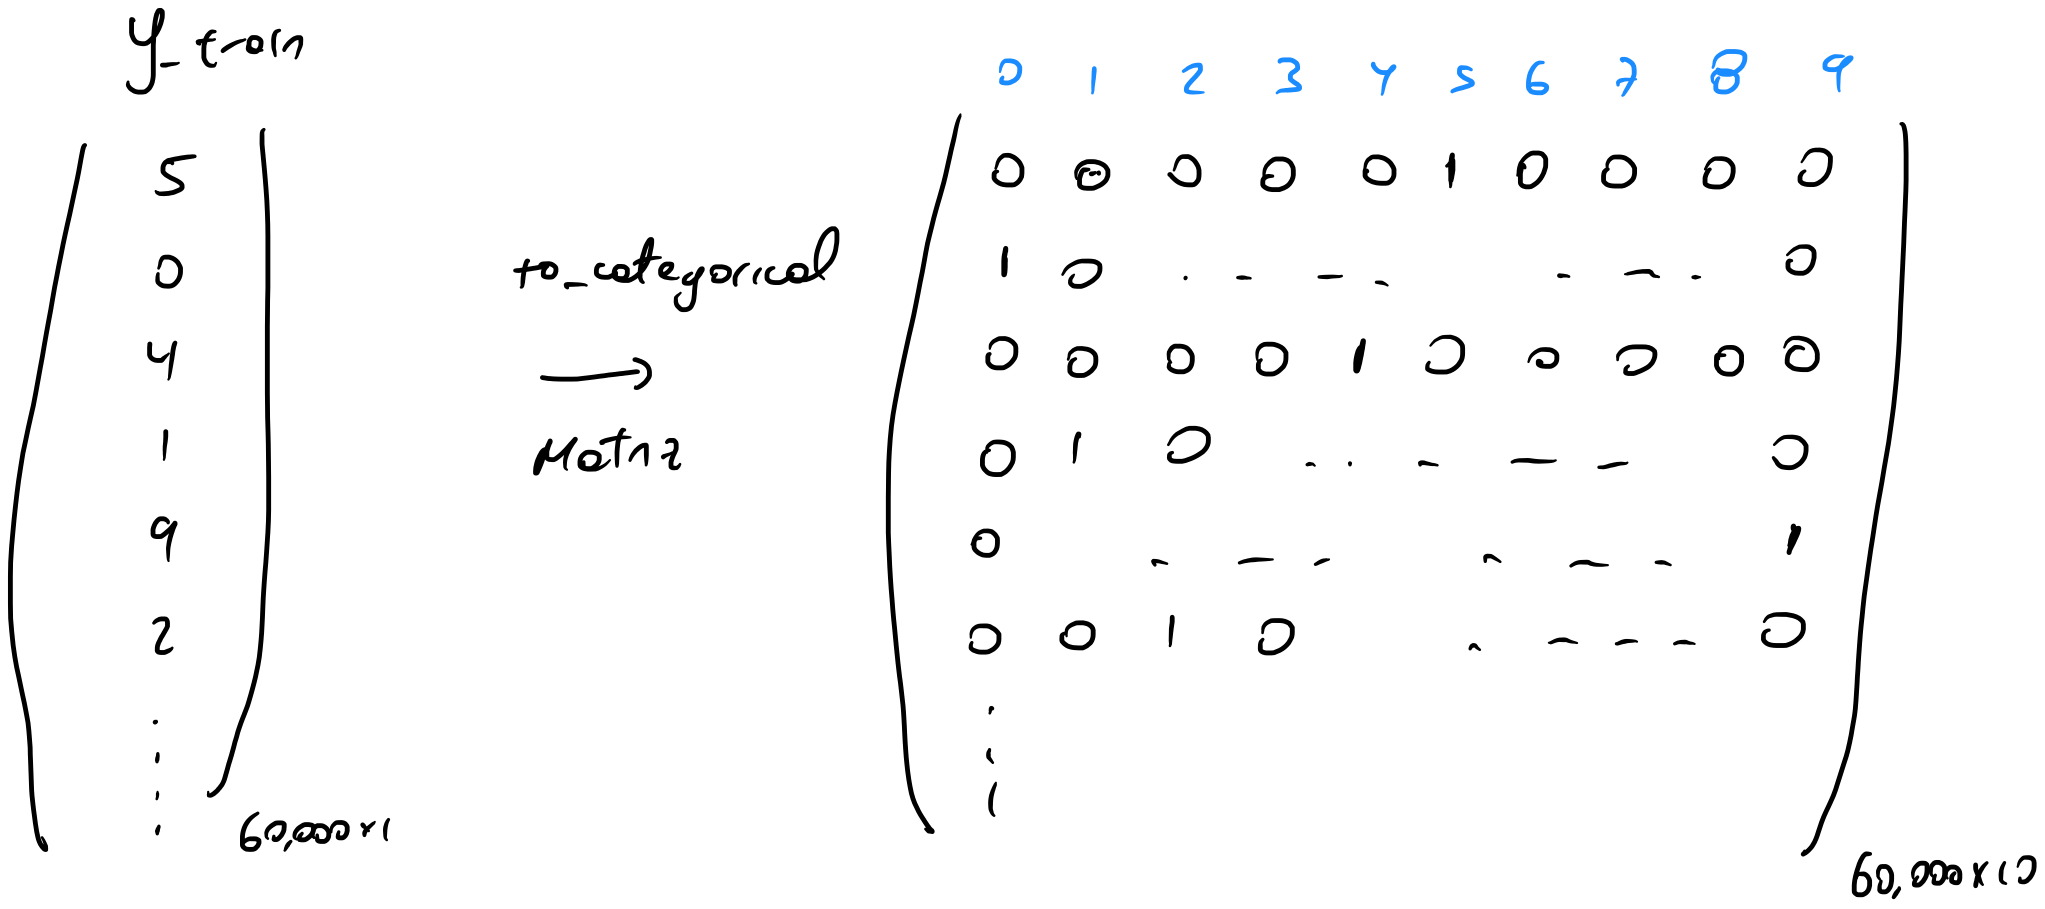

In [ ]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)
head(y_train)

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


### ***3. Armando la primer red***

### 3.1 Configurar las capas

La arquitectura de una red neuronal se construye a partir de capas. Las capas son bloques fundamentales que procesan la entrada y producen la salida. Cada capa se configura con un conjunto de parámetros que definen cómo se transforma la entrada en la salida y los flujos a través de ellas.

Una red neuronal típicamente se compone de tres tipos de capas: capas de entrada, capas ocultas y capas de salida. Cada capa se compone de un conjunto de neuronas que procesan la información de entrada y producen una salida.

* **Capas de entrada**: son la primera capa de la red y se encargan de recibir los datos de entrada y procesarlos para pasarlos a la siguiente capa.
* **Capas ocultas**: son capas intermedias entre la capa de entrada y la capa de salida. Aqui es donde se genera la "magia" a traves de funciones de activación no lineales
* **Capas de salida**: son la última capa de la red y se encargan de producir la salida final. En una red neuronal de clasificación, como la que estamos construyendo, la capa de salida tendría un conjunto de neuronas que representan las diferentes clases posibles y producirían una salida para indicar a qué clase pertenece el dato de entrada.

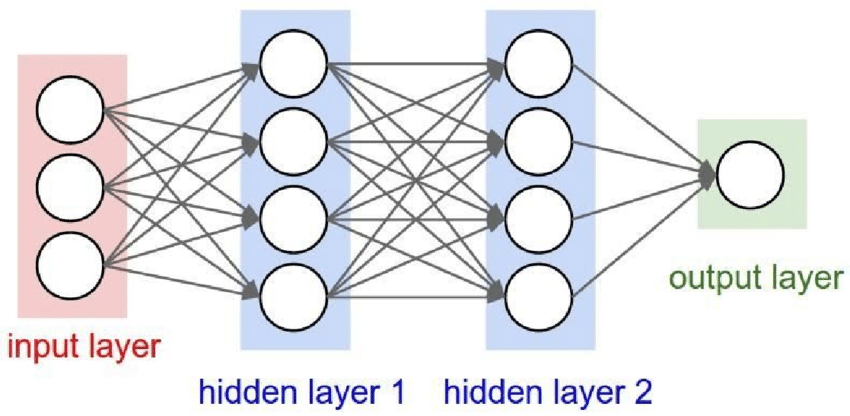
### 3.2 Funciones de Activación para las capas ocultas

*Una función de activación en redes neuronales es como un interruptor en cada neurona que decide si una neurona debería "activarse" o no, basándose en la entrada que recibe. En otras palabras, determina si la neurona debe enviar una señal (activarse) o no.*





# Para qué sirve la funcion de activacion?


*   Una de las funciones principales de la función de activación es **introducir no linealidades** en la red neuronal. **Sin una función no lineal, la red no sería capaz de aprender patrones complejos en los datos.**
*   Define si una neurona se activa o no segun su entrada, lo quue en otras palabras;  **esta decisión de activación o inactivación tiene un impacto directo en la naturaleza de las salidas producidas**



### Función ReLU (rectified linear unit)


En términos simples, la función ReLU actúa como un interruptor. Si la entrada es positiva, la neurona se activa y permite que la información pase a través de ella sin cambios. Si la entrada es negativa, la neurona se apaga y no contribuye a la salida.

**Ventaja principal:** Simplicidad

 $$\operatorname{ReLU}(x) = \max \{x, 0\}.$$

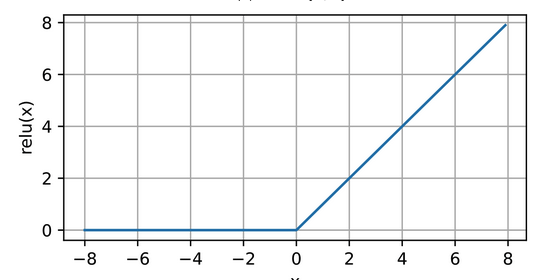


#### Función Sigmoide

En resumen, **la función sigmoide "comprime" las entradas a un rango entre 0 y 1 y se utiliza a menudo en situaciones donde se desea modelar la probabilidad de un evento binario**, como en problemas de clasificación binaria. La naturaleza de la salida en forma de probabilidad hace que sea útil en la capa de salida de la red cuando estamos interesados en asignar una probabilidad a las clases.


$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

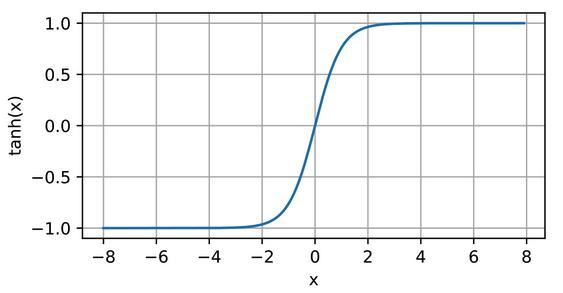

####  Otras funciones de activación

   - $h=cos(W x+b)$ Goodfellow et al. (2016) claim that on the MNIST
        dataset they obtained an error rate of less than 1 percent

   - Radial basis function (RBF):
        $exp\left( \frac{1}{\sigma^2}||W-x||^2 \right)$

   - Softplus: $log(1+e^x)$

   - Hard tanh: $max(-1,min(1,x))$

-   Hidden unit design remains an active area of research, and many
    useful hidden unit types remain to be discovered


In [ ]:
# Crear un modelo secuencial
# Un modelo secuencial es un tipo básico de modelo de red neuronal en el que las capas se apilan una encima de la otra en un orden secuencial.
model <- keras_model_sequential()

# Agregar una capa densa al modelo
model %>%
  layer_dense(units = 10,            # Número de neuronas en la capa
              activation = 'relu',    # Función de activación (ReLU en este caso)
              input_shape = c(784))   # Forma de los datos de entrada a la capa


In [ ]:
model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 10)                      7850        
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

# Agregar capa de salida con su respectiva funcion de activación

Hay dos opciones principales:

1.   **Softmax:** Problemas de clasificación multiclase. (Nuestro problema)
2.   **Sigmoid:** Problemas de clasificación binaria.



In [ ]:
model %>%
    layer_dense(units = 10, activation = 'softmax') #output

In [ ]:
model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 10)                      7850        
 dense_1 (Dense)                    (None, 10)                      110         
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

## Entrenando la primera red

Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Éstos se añaden durante el paso de compilación del modelo:


1.  **Definir Función de pérdida:** *`mide la precisión del modelo durante el entrenamiento`*. Queremos minimizar esta función para "dirigir" el modelo en la dirección correcta. La elección esta intimamente ligada al problema que queremos resolver. En este caso utilizaremos la función sparse_categorical_crossentropy.

2.  **Optimizador:** *`Así es como se actualizan los pesos del modelo.`* Adam un algoritmo de optimización de gradiente descendente estocástico popular utilizado en el aprendizaje automático y la optimización de redes neuronales. Para saber más de este pueden ir acá. Adam un algoritmo de optimización de gradiente descendente estocástico popular utilizado en el aprendizaje automático y la optimización de redes neuronales. Para saber más de este pueden ir acá.



In [ ]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam'

)

1. Un `epoch` determina cuántas veces el algoritmo de aprendizaje automático debe pasar por todo el conjunto de datos de entrenamiento.
2. El conjunto de datos de entrenamiento se divide en lotes más pequeños, y cada lote se utiliza para actualizar los pesos del modelo durante el proceso de entrenamiento. Este enfoque se conoce como el entrenamiento por lotes (`batch training`).

In [ ]:
history <- model %>% fit(
  x_train, y_train,          # Datos de entrenamiento (entradas y etiquetas)
  epochs = 30,               # Número de épocas (iteraciones completas a través del conjunto de entrenamiento)
  batch_size = 128,          # Tamaño del lote (número de muestras utilizadas en cada actualización de peso)
  validation_split = 0.2     # Proporción del conjunto de entrenamiento a utilizar como conjunto de validación
)

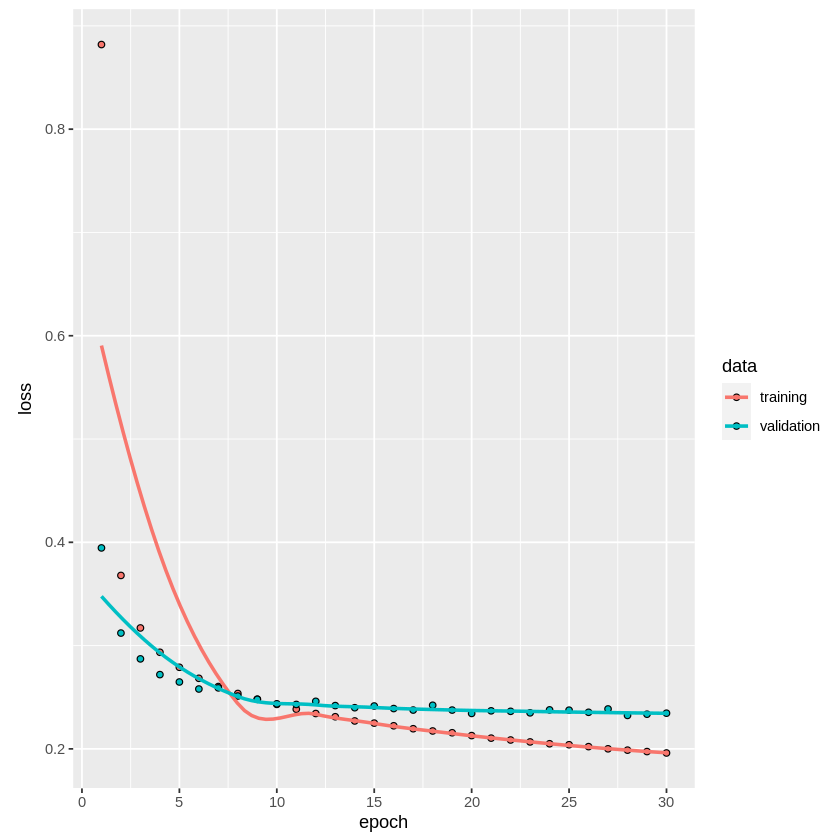

In [ ]:
plot(history)

## Evaluando la primera red

In [ ]:
model %>% evaluate(x_test, y_test)

loss 
0.2350263

`loss` de 0.228653609752655 significa que, en promedio, el modelo tiene un error (pérdida) de aproximadamente 0.23 en sus predicciones en el conjunto de datos de prueba.

### Imprimiendo el primer registro de la data de test: **Es un 7**

In [ ]:
y_test[1,]

[1] 0 0 0 0 0 0 0 1 0 0

In [ ]:
# Realizar predicciones en el conjunto de prueba
phat <- model %>% predict(x_test)

# Mostrar las primeras filas de las predicciones redondeadas a tres decimales
head(round(phat, 3))


0.000,0.000,0.000,0.007,0.000,0,0,0.993,0.000,0.00
0.000,0.000,1.000,0.000,0.000,0,0,0.000,0.000,0.00
0.000,0.988,0.006,0.001,0.000,0,0,0.002,0.002,0.00
1.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.00
0.001,0.000,0.003,0.000,0.977,0,0,0.007,0.001,0.01
0.000,0.995,0.001,0.000,0.000,0,0,0.002,0.001,0.00


In [ ]:
y_hat <- model  %>% predict(x_test) %>% k_argmax() #categoría con probabilidad mas alta
y_hat

tf.Tensor([7 2 1 ... 4 5 6], shape=(10000), dtype=int64)

# Construyendo Matriz de confusión para visualizar el rendimiento

In [ ]:
confusionMatrix(data = factor(as.numeric(y_hat), levels = 0:9),
  reference = factor(mnist$test$y, levels = 0:9))

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  956    0    4    2    1   13   13    1    6    8
         1    0 1113   11    2    2    3    3   10    6    9
         2    0    5  953   13    5    3    6   20    7    0
         3    1    2   10  941    5   32    1   10   32    9
         4    2    1    9    4  901    6    6    5   14   15
         5    6    1    9   24    1  798   15    0   21   12
         6   11    3    6    1   13   11  910    0   12    0
         7    4    1    9   10    2    2    0  947   10   12
         8    0    9   16   11    6   19    4    2  857    3
         9    0    0    5    2   46    5    0   33    9  941

Overall Statistics
                                          
               Accuracy : 0.9317          
                 95% CI : (0.9266, 0.9366)
    No Information Rate : 0.1135          
    P-Value [Acc > NIR] : < 2.2e-16       
                                         

# El Rendimiento (Accuracy) del modelo esde 93%


## Arquitectura de redes y capas múltiples


- Otra consideración clave en el diseño de redes neuronales es determinar
     la arquitectura.

- La palabra arquitectura se refiere a la estructura general del
     red: cuantas unidades debe tener y como deben estar estas unidades
     conectados entre sí.

- El teorema de aproximación universal (Hornik et al., 1989;
    Cybenko, 1989) garantiza que independientemente de
     qué función estamos tratando de aprender, un MLP suficientemente grande
     poder representar esta función.
     
- Sin embargo, no tenemos garantía de que el algoritmo de entrenamiento sea
     capaz de aprender esa función.

- Incluso si la red es capaz de representar la función, el aprendizaje puede
     fracasar por dos motivos diferentes.

     1. Es posible que el algoritmo de optimización utilizado para el entrenamiento no pueda
         encontrar el valor de los parámetros que corresponde al deseado
         función.

     2. El algoritmo de entrenamiento podría elegir la función incorrecta como
         resultado del sobreajuste     
         
- Las redes neuronales modernas suelen tener más de una capa oculta.
     y a menudo muchas unidades por capa.

- En teoría, una única capa oculta con un gran número de unidades tiene la
     capacidad de aproximar la mayoría de funciones.

- Sin embargo, la tarea es mucho más fácil con varias capas, cada una de ellas de tamaño modesto.

In [ ]:
model2 <- keras_model_sequential()

model2 %>%
layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>%
layer_dense(units = 128, activation = 'relu') %>%
layer_dense(units = 10, activation = 'softmax')

In [ ]:
summary(model2)


Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_4 (Dense)                    (None, 256)                     200960      
 dense_3 (Dense)                    (None, 128)                     32896       
 dense_2 (Dense)                    (None, 10)                      1290        
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [ ]:
model2 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy'
)


In [ ]:
history2 <- model2 %>% fit(
  x_train, y_train,
  epochs = 8,
  batch_size = 128,
  validation_split = 0.2
)

In [ ]:
model2 %>% evaluate(x_test, y_test)


loss 
0.07246497

In [ ]:
y_hat2 <- model2  %>% predict(x_test) %>% k_argmax() #categoría con probabilidad mas alta
confusionMatrix(data = factor(as.numeric(y_hat2), levels = 0:9),
  reference = factor(mnist$test$y, levels = 0:9))

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  970    0    5    0    2    2    1    1    1    3
         1    0 1119    0    0    0    0    2    0    0    3
         2    1    3 1011    5    4    0    0    5    5    1
         3    2    2    0  988    0    7    1    1    2    8
         4    0    0    5    0  968    1    3    1    2   15
         5    0    0    0    3    0  862    2    0    2    2
         6    5    5    2    0    2    8  949    0    5    1
         7    1    2    5    7    2    2    0 1015    5    8
         8    1    4    4    6    1    6    0    0  951    2
         9    0    0    0    1    3    4    0    5    1  966

Overall Statistics
                                         
               Accuracy : 0.9799         
                 95% CI : (0.977, 0.9826)
    No Information Rate : 0.1135         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
    